In [1]:
import pandas as pd 
import numpy as np

from nltk.sentiment.vader import SentimentIntensityAnalyzer

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split # Import train_test_split function

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("C:\\Users\\Dimmer\\Desktop\\projects-and-reports\\weka-analysis\\politics\\all_politics_data.csv")
df.to_csv('politics.csv')
df.head()

,index,0,1,2,3,4,5,6,7,8,...,45,46,47,48,49,50,51,52,53,54
0,Labour plans maternity pay rise,Maternity pay for new mothers is to rise by £1...,It would mean paid leave would be increased to...,"Ms Hewitt said: ""We have already doubled the l...",She said the Conservatives would announce thei...,Ms Hewitt also stressed the plans would be pai...,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Watchdog probes e-mail deletions,The information commissioner says he is urgent...,"Richard Thomas ""totally condemned"" the deletio...",Tory leader Michael Howard has written to Tony...,"Mr Thomas said: ""The new Act of Parliament mak...","If in doubt retain, that has been the long-sta...",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Hewitt decries 'career sexism',Plans to extend paid maternity leave beyond si...,Patricia Hewitt said the cost of the proposals...,Ms Hewitt also announced a new drive to help w...,The minister told delegates that getting rid o...,Career sexism limits opportunities for women o...,"She added that while progress had been made, t...",It has been set up to advise hundreds of compa...,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Labour chooses Manchester,The Labour Party will hold its 2006 autumn con...,The much trailed decision was ratified by Labo...,For years the main political parties have rota...,"Colin Asplin, Blackpool Hotel Association said...",NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Brown ally rejects Budget spree,Chancellor Gordon Brown's closest ally has den...,"Ed Balls, ex-chief economic adviser to the Tre...","Mr Balls, who stepped down from his Treasury p...",He also stressed rise in interest rates ahead ...,During an interview with BBC Radio 4's Today p...,His assurances came after Sir Digby Jones said...,Mr Balls refused to say whether Mr Brown would...,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
sid=SentimentIntensityAnalyzer()

df['index_score'] = (df['index'].apply(lambda review:sid.polarity_scores(review))).apply(lambda d:d['compound'])
df['desc1_score'] = (df['0'].apply(lambda review:sid.polarity_scores(review))).apply(lambda d:d['compound'])
df['desc2_score'] = (df['1'].apply(lambda review:sid.polarity_scores(review))).apply(lambda d:d['compound'])
#df2['desc3_score'] = (df2['2'].apply(lambda review:sid.polarity_scores(review))).apply(lambda d:d['compound'])
#df2['desc4_score'] = (df2['3'].apply(lambda review:sid.polarity_scores(review))).apply(lambda d:d['compound'])

def getSentiment(p):
    if p <= 0:
        return 0
    else:
        return 1

df['label'] = df['index_score'].apply(getSentiment)
df.head()

,index,0,1,2,3,4,5,6,7,8,...,49,50,51,52,53,54,index_score,desc1_score,desc2_score,label
0,Labour plans maternity pay rise,Maternity pay for new mothers is to rise by £1...,It would mean paid leave would be increased to...,"Ms Hewitt said: ""We have already doubled the l...",She said the Conservatives would announce thei...,Ms Hewitt also stressed the plans would be pai...,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,-0.1027,-0.1027,0.0258,0
1,Watchdog probes e-mail deletions,The information commissioner says he is urgent...,"Richard Thomas ""totally condemned"" the deletio...",Tory leader Michael Howard has written to Tony...,"Mr Thomas said: ""The new Act of Parliament mak...","If in doubt retain, that has been the long-sta...",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0000,0.0000,-0.1263,0
2,Hewitt decries 'career sexism',Plans to extend paid maternity leave beyond si...,Patricia Hewitt said the cost of the proposals...,Ms Hewitt also announced a new drive to help w...,The minister told delegates that getting rid o...,Career sexism limits opportunities for women o...,"She added that while progress had been made, t...",It has been set up to advise hundreds of compa...,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0000,0.4215,0.7876,0
3,Labour chooses Manchester,The Labour Party will hold its 2006 autumn con...,The much trailed decision was ratified by Labo...,For years the main political parties have rota...,"Colin Asplin, Blackpool Hotel Association said...",NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0000,0.4019,0.5106,0
4,Brown ally rejects Budget spree,Chancellor Gordon Brown's closest ally has den...,"Ed Balls, ex-chief economic adviser to the Tre...","Mr Balls, who stepped down from his Treasury p...",He also stressed rise in interest rates ahead ...,During an interview with BBC Radio 4's Today p...,His assurances came after Sir Digby Jones said...,Mr Balls refused to say whether Mr Brown would...,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,-0.4939,-0.4404,0.1779,0


In [5]:
feature_cols=['index_score','desc1_score','desc2_score']
X = df[feature_cols] # Features
y = df.label # Target variable
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

Accuracy: 1.0
[[100   0]
 [  0  26]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       100
           1       1.00      1.00      1.00        26

    accuracy                           1.00       126
   macro avg       1.00      1.00      1.00       126
weighted avg       1.00      1.00      1.00       126

Mean Absolute Error: 0.0
Mean Squared Error: 0.0
Root Mean Squared Error: 0.0


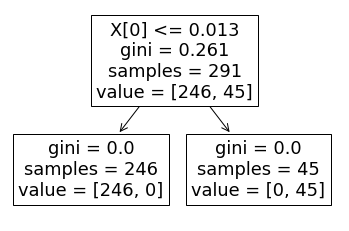

In [6]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

tree.plot_tree(clf);

In [7]:
# Split dataset into training set and test set
X2_train, X2_test, y2_train, y2_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X2_train, y2_train)
print('Accuracy of GNB classifier on training set: {:.2f}'
     .format(gnb.score(X2_train, y2_train)))
print('Accuracy of GNB classifier on test set: {:.2f}'
     .format(gnb.score(X2_test, y2_test)))

from sklearn.metrics import classification_report, confusion_matrix
y2_pred = gnb.predict(X2_test)
print(confusion_matrix(y2_test, y2_pred))
print(classification_report(y2_test, y2_pred))

from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y2_test, y2_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y2_test, y2_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y2_test, y2_pred)))

Accuracy of GNB classifier on training set: 0.95
Accuracy of GNB classifier on test set: 0.94
[[100   0]
 [  7  19]]
              precision    recall  f1-score   support

           0       0.93      1.00      0.97       100
           1       1.00      0.73      0.84        26

    accuracy                           0.94       126
   macro avg       0.97      0.87      0.91       126
weighted avg       0.95      0.94      0.94       126

Mean Absolute Error: 0.05555555555555555
Mean Squared Error: 0.05555555555555555
Root Mean Squared Error: 0.23570226039551584


In [8]:
# Split dataset into training set and test set
X3_train, X3_test, y3_train, y3_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

from sklearn.svm import SVC
svm = SVC()
svm.fit(X3_train, y3_train)
print('Accuracy of SVM classifier on training set: {:.2f}'
     .format(svm.score(X3_train, y3_train)))
print('Accuracy of SVM classifier on test set: {:.2f}'
     .format(svm.score(X3_test, y3_test)))

from sklearn.metrics import classification_report, confusion_matrix
y3_pred = gnb.predict(X3_test)
print(confusion_matrix(y3_test, y3_pred))
print(classification_report(y3_test, y3_pred))

from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y3_test, y3_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y3_test, y3_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y3_test, y3_pred)))

Accuracy of SVM classifier on training set: 0.95
Accuracy of SVM classifier on test set: 0.93
[[100   0]
 [  7  19]]
              precision    recall  f1-score   support

           0       0.93      1.00      0.97       100
           1       1.00      0.73      0.84        26

    accuracy                           0.94       126
   macro avg       0.97      0.87      0.91       126
weighted avg       0.95      0.94      0.94       126

Mean Absolute Error: 0.05555555555555555
Mean Squared Error: 0.05555555555555555
Root Mean Squared Error: 0.23570226039551584


C:\Users\Dimmer\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


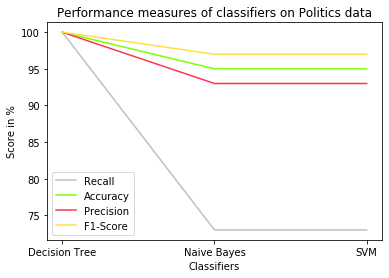

In [9]:
Classifiers =['Decision Tree', 'Naive Bayes', 'SVM']
Accuracy = [100, 95, 95]
Precision = [100,93,93]
Recall = [100,73,73]
F1_Score = [100,97,97]


plt.plot(Classifiers, Recall, color='0.75', label='Recall')
plt.plot(Classifiers, Accuracy, color='chartreuse', label='Accuracy')
plt.plot(Classifiers, Precision, color=(1.0,0.2,0.3), label='Precision')
plt.plot(Classifiers, F1_Score, color='#FFDD44', label='F1-Score')
plt.title("Performance measures of classifiers on Politics data")
plt.xlabel("Classifiers")
plt.ylabel("Score in %")
plt.legend()
plt.show()

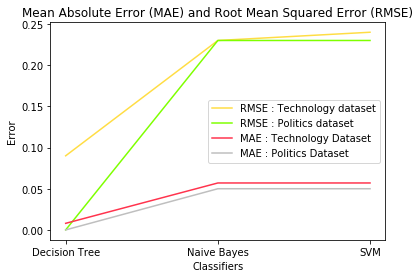

In [10]:
Classifiers =['Decision Tree', 'Naive Bayes', 'SVM']
mae_p = [0.0, 0.05, 0.05]
rmse_p = [0.0,0.23,0.23]
mae_t = [0.008, 0.057, 0.057]
rmse_t = [0.09,0.23,0.24]

plt.plot(Classifiers, rmse_t, color='#FFDD44', label='RMSE : Technology dataset')
plt.plot(Classifiers, rmse_p, color='chartreuse', label='RMSE : Politics dataset')


plt.plot(Classifiers, mae_t, color=(1.0,0.2,0.3), label='MAE : Technology Dataset')
plt.plot(Classifiers, mae_p, color='0.75', label='MAE : Politics Dataset')


plt.title("Mean Absolute Error (MAE) and Root Mean Squared Error (RMSE)")
plt.xlabel("Classifiers")
plt.ylabel("Error")
plt.legend()
plt.show()

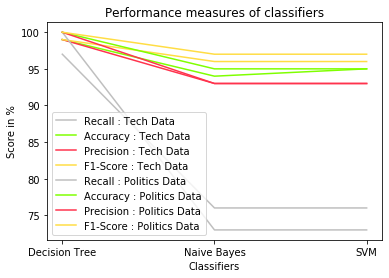

In [11]:
Classifiers =['Decision Tree', 'Naive Bayes', 'SVM']
acc_t = [99, 94, 95]
prec_t = [99,93,93]
rec_t = [97,76,76]
f1_t = [99,96,96]

acc_p = [100, 95, 95]
prec_p = [100,93,93]
rec_p = [100,73,73]
f1_p = [100,97,97]



plt.plot(Classifiers, rec_t, color='0.75', label='Recall : Tech Data')
plt.plot(Classifiers, acc_t, color='chartreuse', label='Accuracy : Tech Data')
plt.plot(Classifiers, prec_t, color=(1.0,0.2,0.3), label='Precision : Tech Data')
plt.plot(Classifiers, f1_t, color='#FFDD44', label='F1-Score : Tech Data')


plt.plot(Classifiers, rec_p, color='0.75', label='Recall : Politics Data')
plt.plot(Classifiers, acc_p, color='chartreuse', label='Accuracy : Politics Data')
plt.plot(Classifiers, prec_p, color=(1.0,0.2,0.3), label='Precision : Politics Data')
plt.plot(Classifiers, f1_p, color='#FFDD44', label='F1-Score : Politics Data')

plt.title("Performance measures of classifiers")
plt.xlabel("Classifiers")
plt.ylabel("Score in %")
plt.legend()
plt.show()